In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [2]:
data = 'customer_acquisition_cost_dataset.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers
0,CUST0001,Email Marketing,3489.027844,16
1,CUST0002,Online Ads,1107.865808,33
2,CUST0003,Social Media,2576.081025,44
3,CUST0004,Online Ads,3257.567932,32
4,CUST0005,Email Marketing,1108.408185,13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        500 non-null    object 
 1   Marketing_Channel  500 non-null    object 
 2   Marketing_Spend    500 non-null    float64
 3   New_Customers      500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [6]:
df.describe()

,Marketing_Spend,New_Customers
count,500.000000,500.000000
mean,3094.726549,30.070000
std,1136.628605,11.754209
min,1010.702890,10.000000
25%,2131.835093,19.000000
50%,3155.976673,31.000000
75%,4027.494116,40.000000
max,4999.631314,50.000000


In [7]:
df.describe(include='object')

,Customer_ID,Marketing_Channel
count,500,500
unique,500,4
top,CUST0001,Online Ads
freq,1,130


## Marketing Channels Distribution

This visualization provides insight into which channels are used most frequently for customer acquisition.
In this case, the Email Marketing channel has been the most effective channel and the referral channel has been the least effective

Text(0.5, 1.0, 'Marketing Channels')

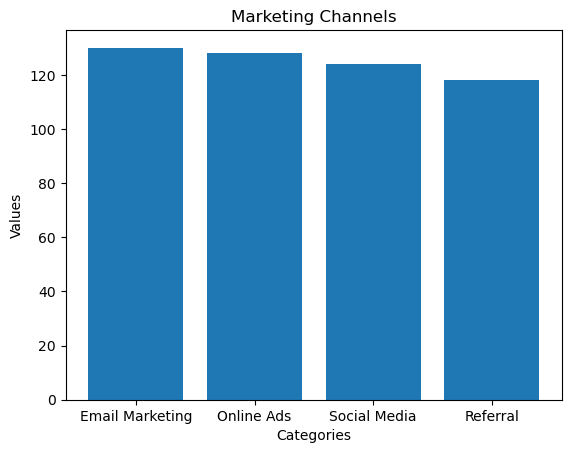

In [8]:
plt.bar(list(df['Marketing_Channel'].unique()), df['Marketing_Channel'].value_counts())
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Marketing Channels')

## Marketing Spend Distribution

The normal distribution curve and Student's t distribution curve, help understand the distribution of marketing spend. It allows you to identify whether marketing spend follows a normal or t-distribution, which can inform budgeting and decision-making.
On avergae, most of the Expenses are distributed around 2000 to 4000, and only few outliers outside this range. so it's only logical that the budget is centered within this range.

In [9]:
mean = df.Marketing_Spend.mean()
std_dev = df.Marketing_Spend.std()

In [10]:
# Generate data points for the x-axis
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 1000)

# Calculate the probability density function (PDF) for the normal distribution
pdf = norm.pdf(x, loc=mean, scale=std_dev)

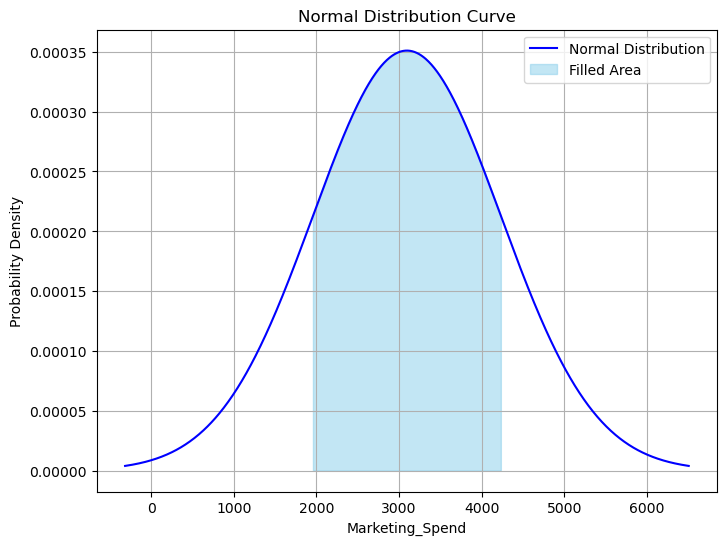

In [11]:
# Create a Matplotlib figure and plot the normal distribution curve
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label='Normal Distribution', color='blue')
plt.fill_between(x, pdf, 0, where=(x >= mean - std_dev) & (x <= mean + std_dev), color='skyblue', alpha=0.5, label='Filled Area')
plt.legend()
# Add labels and a legend
plt.xlabel('Marketing_Spend')
plt.ylabel('Probability Density')
plt.title('Normal Distribution Curve')
# Display the plot
plt.grid(True)
plt.show()

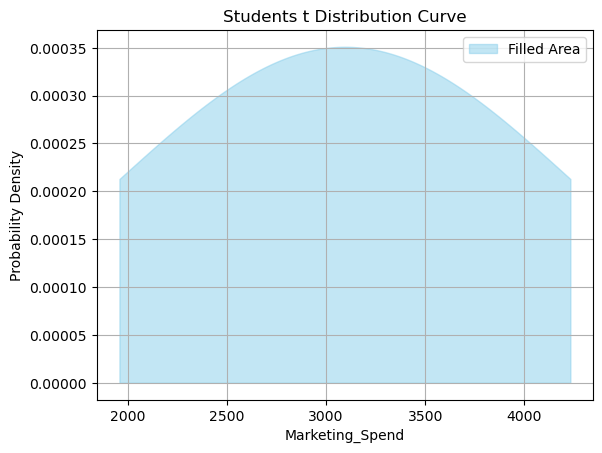

In [12]:
plt.fill_between(x, pdf, 0, where=(x >= mean - std_dev) & (x <= mean + std_dev), color='skyblue', alpha=0.5, label='Filled Area')
# Add labels and a legend
plt.xlabel('Marketing_Spend')
plt.ylabel('Probability Density')
plt.title('Students t Distribution Curve')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## New Customer Distribution

This histogram of new customers illustrates the distribution of new customers. This can help you identify patterns in customer acquisition and understand whether there are any outliers.

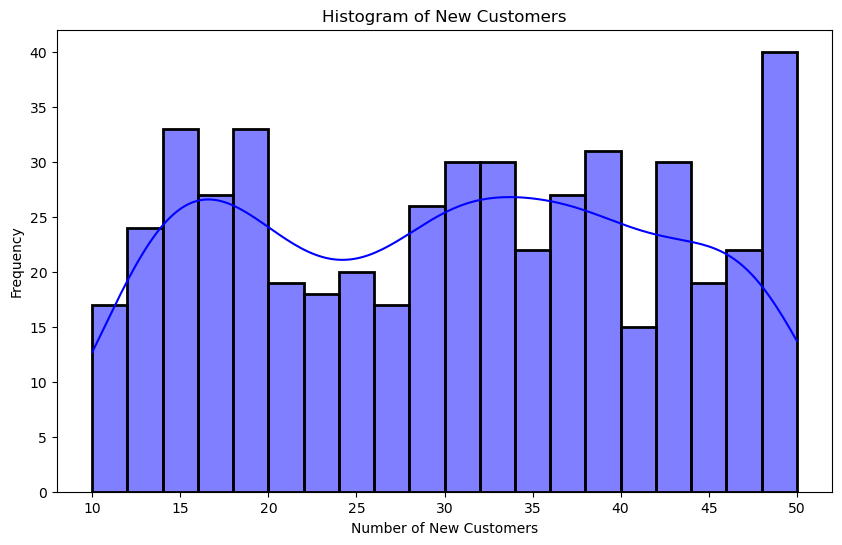

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['New_Customers'], bins=20, color='blue', kde=True, lw=2)
plt.xlabel('Number of New Customers')
plt.ylabel('Frequency')
plt.title('Histogram of New Customers')
plt.show()

In [14]:
#CAC
df['CAC'] = df['Marketing_Spend'] / df['New_Customers']
#Conversion rate
df['Conversion_rate'] = df['New_Customers'] / df['Marketing_Spend']
#Breakeven customers
df['Breakeven_customers'] = df['Marketing_Spend'] / df['CAC']

In [15]:
df.head()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,CAC,Conversion_rate,Breakeven_customers
0,CUST0001,Email Marketing,3489.027844,16,218.064240,0.004586,16.0
1,CUST0002,Online Ads,1107.865808,33,33.571691,0.029787,33.0
2,CUST0003,Social Media,2576.081025,44,58.547296,0.017080,44.0
3,CUST0004,Online Ads,3257.567932,32,101.798998,0.009823,32.0
4,CUST0005,Email Marketing,1108.408185,13,85.262168,0.011729,13.0


## CAC Analysis
The Customer Acquisition Cost (CAC) helps in understanding the relationship between the number of new customers and the cost associated with acquiring them. It allows you to analyze the efficiency of customer acquisition strategies and identify any outliers or trends.

The downward projection of the regression line indicates the reduction in Customer acquisition cost as the number of new customers increases. Meaning the business tends to spend less as they acquire more customers.

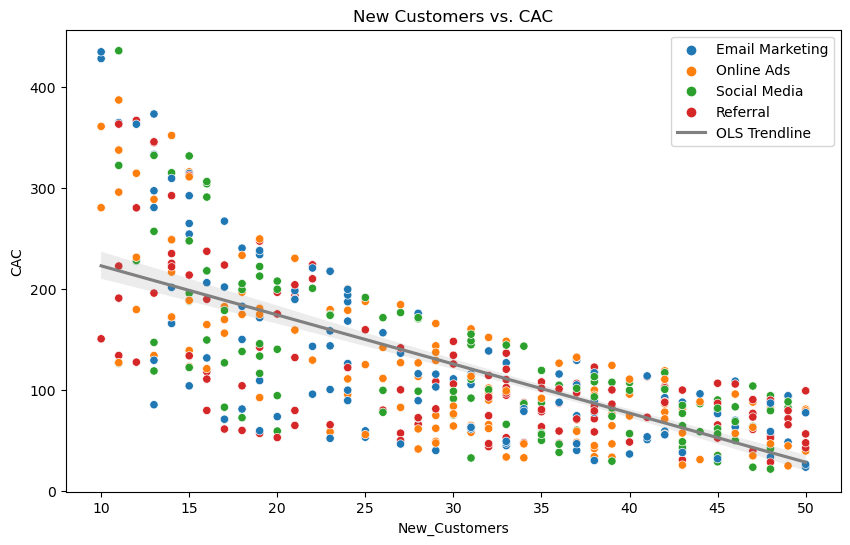

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='New_Customers', y='CAC', hue='Marketing_Channel')
plt.title('New Customers vs. CAC')
sns.regplot(data=df, x='New_Customers', y='CAC', scatter=False, color='gray', label='OLS Trendline')
plt.legend()
plt.show()

## Conversion Rate Analysis
The Conversion rates by marketing channel show which channels are the most effective in terms of converting marketing spend into new customers. This insight can guide marketing strategy decisions.

In this case, Online ads has been the most effective channel, although the others are not too far behind, this helps in the decision making and budget allocation processs.

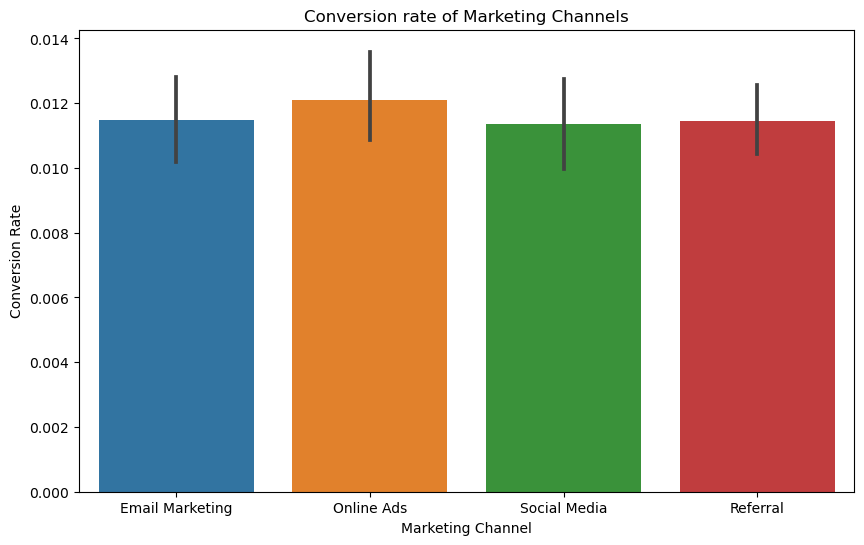

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Marketing_Channel', y='Conversion_rate', data=df)
plt.xlabel('Marketing Channel')
plt.ylabel('Conversion Rate')
plt.title('Conversion rate of Marketing Channels')
plt.xticks()
plt.show()

## Breakeven Customers
The Breakeven customers by marketing channel show how many customers need to be acquired to cover the marketing spend. This can inform decision-making about budget allocation and the sustainability of marketing strategies.

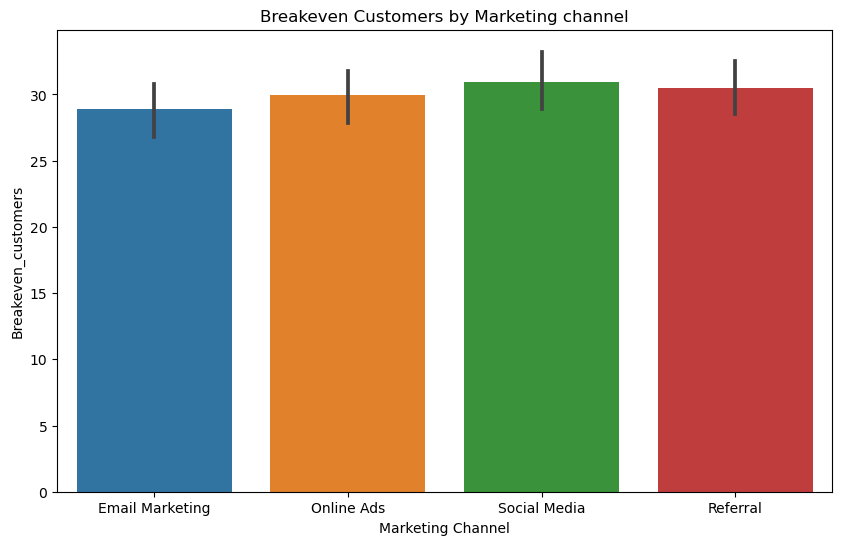

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Marketing_Channel', y='Breakeven_customers', data=df)
plt.xlabel('Marketing Channel')
plt.ylabel('Breakeven_customers')
plt.title('Breakeven Customers by Marketing channel')
plt.xticks()
plt.show()

## Comparison of Breakeven and New Customers
The comparison plot shows the relationship between breakeven customers and new customers by marketing channel. It helps in understanding which channels are most cost-effective in terms of achieving breakeven.

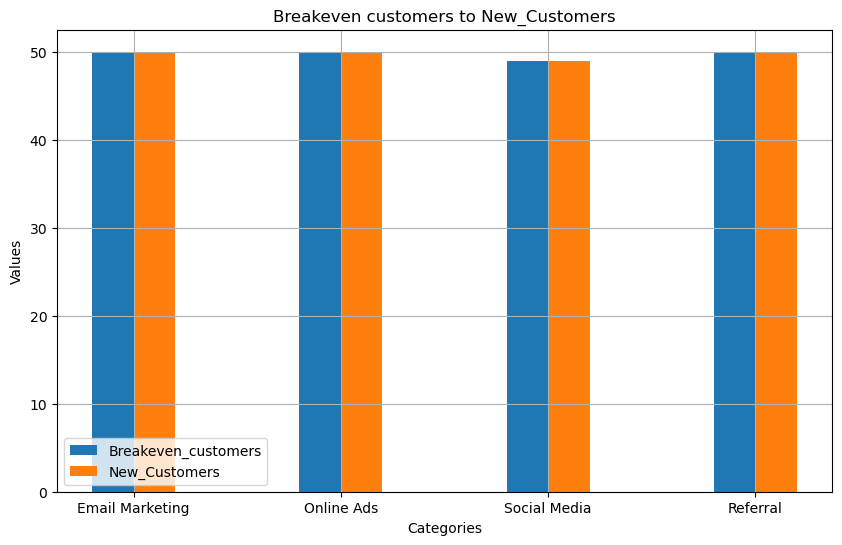

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(df['Marketing_Channel'], df['Breakeven_customers'], width=0.4, align='center', label='Breakeven_customers')
plt.bar(df['Marketing_Channel'], df['New_Customers'], width=0.2, align='edge', label='New_Customers')
plt.legend(loc='lower left')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Breakeven customers to New_Customers')

# Display the plot
plt.grid(True)

## Marketing Spend vs. CAC Relationship
This scatter plot of marketing spend vs. CAC, color-coded by marketing channel, helps understand the relationship between marketing spend and the associated customer acquisition cost. It can provide insights into cost-efficiency across different channels.

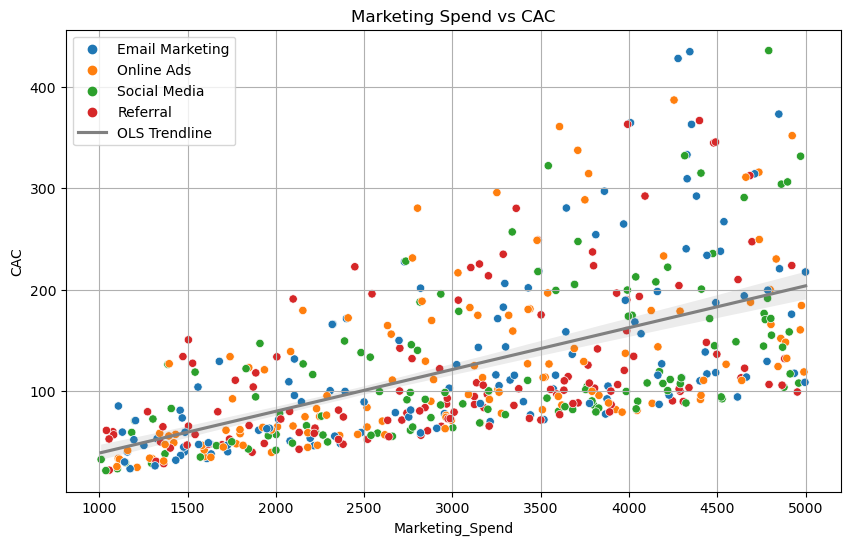

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Marketing_Spend', y='CAC', hue='Marketing_Channel')
sns.regplot(data=df, x='Marketing_Spend', y='CAC', scatter=False, color='gray', label='OLS Trendline')
plt.legend()
plt.xlabel('Marketing_Spend')
plt.ylabel('CAC')
plt.title('Marketing Spend vs CAC')
plt.grid(True)